In [1]:
pacman::p_load(BayesSpace, SingleCellExperiment, ggplot2, here)
here::here()

[1] "/home/op/Projects/2025Q1-DAAD-sc-spatial"

In [2]:
dataset <- readVisium(here("Module_2", "S14", "01_data"))

Loading Visium with SpaceRanger version >= V2.0



In [3]:
dataset <- spatialPreprocess(dataset, platform="Visium", 
                              n.PCs=15, n.HVGs=2000, log.normalize=TRUE)

In [4]:
dataset

class: SingleCellExperiment 
dim: 18085 6195 
metadata(1): BayesSpace.data
assays(2): counts logcounts
rownames(18085): SAMD11 NOC2L ... MT-ND6 MT-CYB
rowData names(3): gene_id gene_name is.HVG
colnames(6195): TGAGCTCCGTTGCTTC-1 CTAAGTTCGGACGGCT-1 ...
  CGCACTTCTAGCGGCT-1 CAAGTGCGACATAAGA-1
colData names(7): barcode in_tissue ... pxl_col_in_fullres sizeFactor
reducedDimNames(1): PCA
mainExpName: NULL
altExpNames(0):

Neighbors were identified for 6192 out of 6195 spots.

[DEBUG] Back end for parallelization is not provided. Initializing...

[DEBUG] Provided effective arguments for creating a parallelization back end: workers=2

[DEBUG] A fork back end is created.

[DEBUG] Provided effective arguments for the customized function: 

R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs


R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 4 strerror: Unterbrechung während des Betriebssystemaufrufs
R_zmq_msg_send errno: 

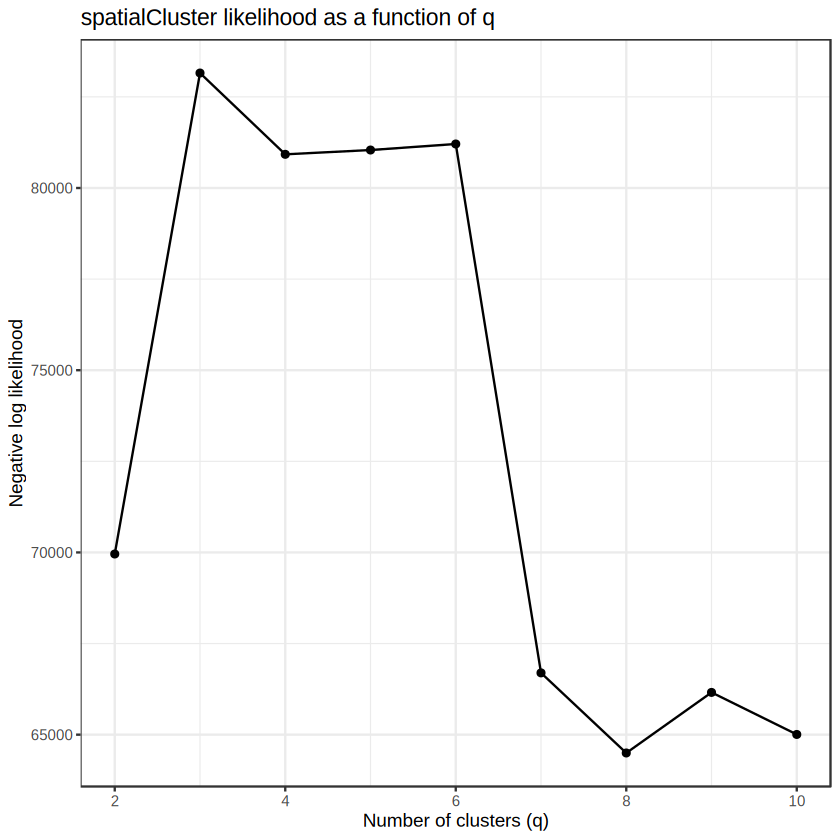

In [5]:
dataset <- qTune(dataset, qs=seq(2, 10), platform="Visium", d=7, cores=2)
qPlot(dataset)

In [6]:
dataset = spatialCluster(dataset, nrep = 1000, burn.in = 100, q = 7)

Neighbors were identified for 6192 out of 6195 spots.

Fitting model...

Calculating labels using iterations 101 through 1000.



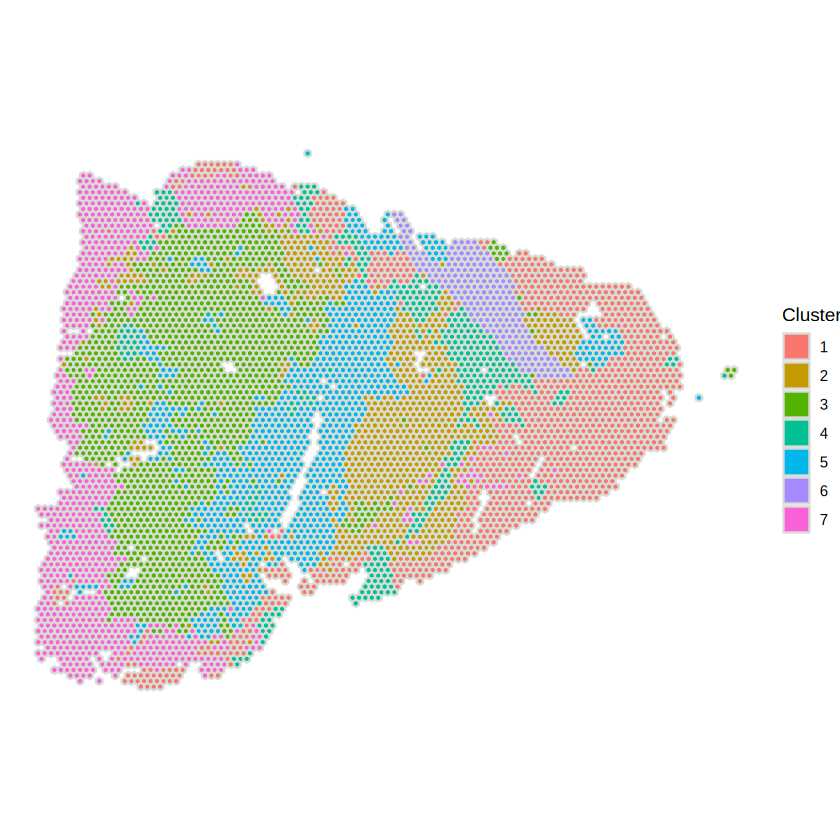

In [7]:
clusterPlot(dataset)

In [8]:
dataset_enhanced <- spatialEnhance(dataset, q=7, platform="Visium", d=7,
                                    model="t", gamma=2,
                                    jitter.prior=0.3, jitter.scale=3.5,
                                    nrep=1000, burn.in=100,
                                    save.chain=FALSE, cores = 1)

Calculating labels using iterations 101 through 1000.



In [9]:
markers <- c("MKI67", "CD2", "EGFR", "MYC", "BRAF", "MET")
dataset_enhanced <- enhanceFeatures(dataset_enhanced, dataset,
                                    model = "lm", 
                                     feature_names=markers,
                                     nrounds=0)

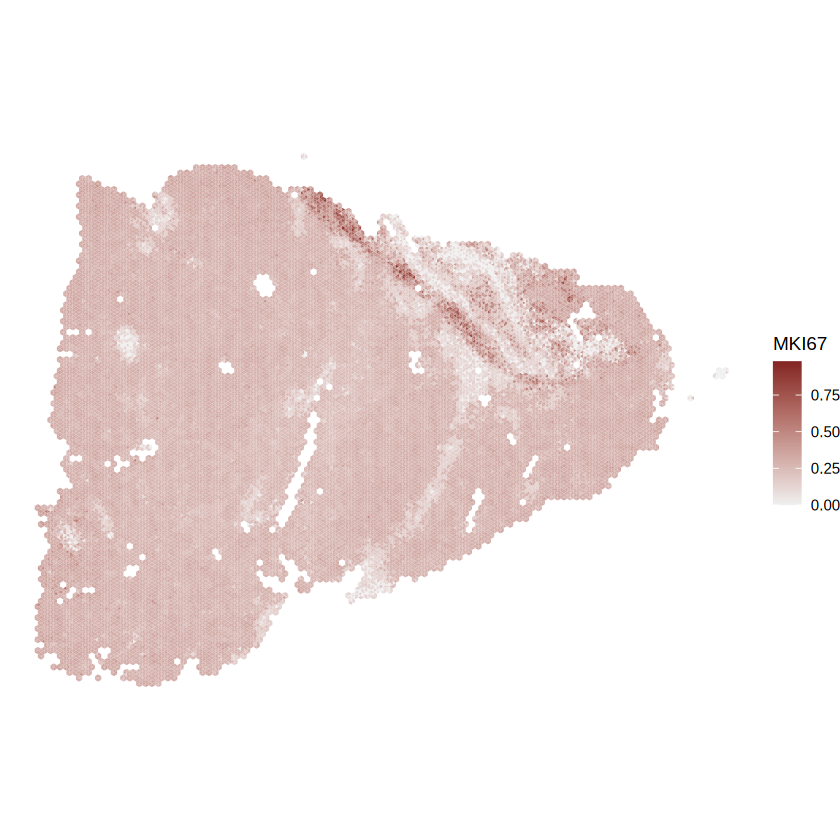

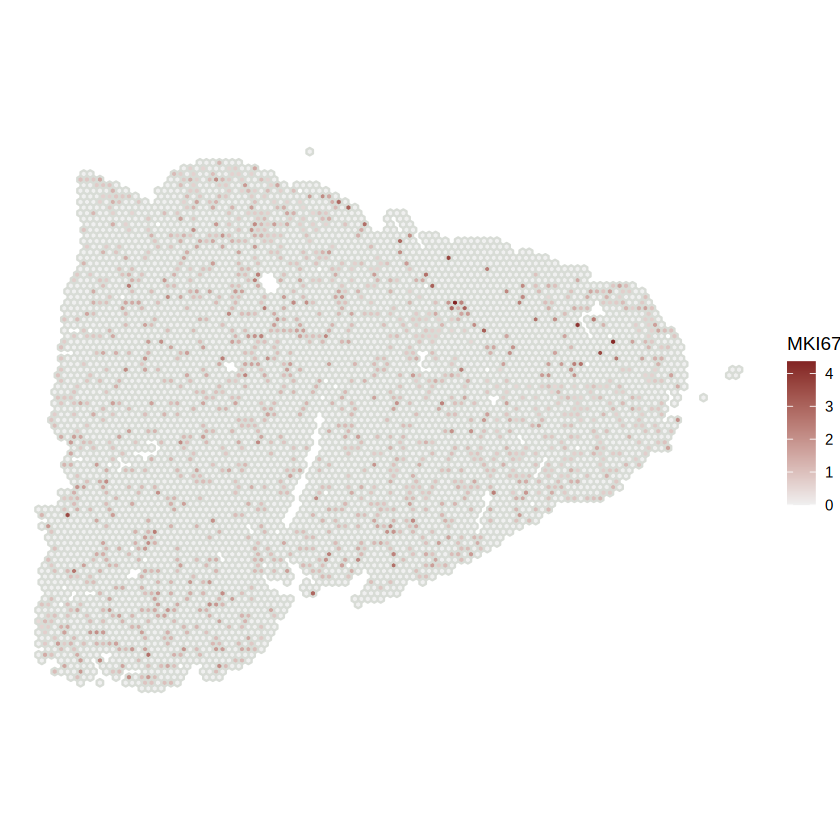

In [14]:
featurePlot(dataset_enhanced, "MKI67")
featurePlot(dataset, "MKI67")                 